In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
df = pd.read_csv('data/opportunities.csv',low_memory=False)
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [3]:
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])

In [4]:
#funcion para calcular la conversion a dolar
def conversion(x):
    if (x["Total_Taxable_Amount_Currency"] == "USD"):
        return 1
    elif (x["Total_Taxable_Amount_Currency"] == x["ASP_Currency"] and float(x["ASP"]) != 0):  
        return x["ASP_(converted)"] / float(x["ASP"])
    else:
        return None

In [5]:
#creo condicion donde para filtrar registros donde no tenga manera de convertir a moneda el total taxeable
condition = (df['Total_Taxable_Amount_Currency'] != df['Total_Amount_Currency'])\
& (df['Total_Taxable_Amount_Currency'] != df['ASP_Currency'])\
& (df['Total_Taxable_Amount_Currency'] != df['ASP_(converted)_Currency'])

In [6]:
df_closed_won_lost = df.loc[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost'),:]
df_closed_won_lost_filtered = df_closed_won_lost.loc[condition!= True]

In [7]:
#agrego el valor de conversion a moneda dolar
df_closed_won_lost_filtered["convertion"] = df_closed_won_lost_filtered.apply(conversion, axis=1)

In [8]:
#Convierto el total tax amount a moneda dolar para poder comparar
df_closed_won_lost_filtered["Total Taxable Amount (USD)"] = df_closed_won_lost_filtered["Total_Taxable_Amount"] * df_closed_won_lost_filtered["convertion"]

In [9]:
df_opp_name = df_closed_won_lost_filtered.groupby("Opportunity_Name").agg({"Total Taxable Amount (USD)":"mean",\
                                                            "Stage":"first",\
                                                            "Opportunity_Owner":"first",\
                                                            "Opportunity_Created_Date":"first"})\
.reset_index().sort_values("Opportunity_Created_Date")

df_opp_name.head()

,Opportunity_Name,Total Taxable Amount (USD),Stage,Opportunity_Owner,Opportunity_Created_Date
5787,Opportunity_Name_5265,7.490997e+05,Closed Lost,Person_Name_16,2013-11-05
5328,Opportunity_Name_4731,9.803430e+06,Closed Lost,Person_Name_4,2014-03-21
2554,Opportunity_Name_1390,3.418632e+05,Closed Lost,Person_Name_8,2014-03-28
5437,Opportunity_Name_4854,3.141078e+07,Closed Won,Person_Name_12,2014-05-13
450,Opportunity_Name_10475,1.644500e+05,Closed Lost,Person_Name_49,2014-05-19


In [10]:
df_aux = df_opp_name.copy()
df_aux

,Opportunity_Name,Total Taxable Amount (USD),Stage,Opportunity_Owner,Opportunity_Created_Date
5787,Opportunity_Name_5265,7.490997e+05,Closed Lost,Person_Name_16,2013-11-05
5328,Opportunity_Name_4731,9.803430e+06,Closed Lost,Person_Name_4,2014-03-21
2554,Opportunity_Name_1390,3.418632e+05,Closed Lost,Person_Name_8,2014-03-28
5437,Opportunity_Name_4854,3.141078e+07,Closed Won,Person_Name_12,2014-05-13
450,Opportunity_Name_10475,1.644500e+05,Closed Lost,Person_Name_49,2014-05-19
...,...,...,...,...,...
7945,Opportunity_Name_7852,1.134300e+04,Closed Won,Person_Name_64,2018-12-22
1179,Opportunity_Name_11401,1.372140e+05,Closed Won,Person_Name_52,2018-12-24
8190,Opportunity_Name_8090,9.636352e+03,Closed Won,Person_Name_32,2018-12-26
8422,Opportunity_Name_8377,3.094416e+05,Closed Won,Person_Name_8,2018-12-28


In [11]:
df_aux.loc[df_aux["Stage"] == "Closed Lost",["Total Taxable Amount (USD)"]] = - df_opp_name[df_opp_name["Stage"] == "Closed Lost"]["Total Taxable Amount (USD)"]
df_aux

,Opportunity_Name,Total Taxable Amount (USD),Stage,Opportunity_Owner,Opportunity_Created_Date
5787,Opportunity_Name_5265,-7.490997e+05,Closed Lost,Person_Name_16,2013-11-05
5328,Opportunity_Name_4731,-9.803430e+06,Closed Lost,Person_Name_4,2014-03-21
2554,Opportunity_Name_1390,-3.418632e+05,Closed Lost,Person_Name_8,2014-03-28
5437,Opportunity_Name_4854,3.141078e+07,Closed Won,Person_Name_12,2014-05-13
450,Opportunity_Name_10475,-1.644500e+05,Closed Lost,Person_Name_49,2014-05-19
...,...,...,...,...,...
7945,Opportunity_Name_7852,1.134300e+04,Closed Won,Person_Name_64,2018-12-22
1179,Opportunity_Name_11401,1.372140e+05,Closed Won,Person_Name_52,2018-12-24
8190,Opportunity_Name_8090,9.636352e+03,Closed Won,Person_Name_32,2018-12-26
8422,Opportunity_Name_8377,3.094416e+05,Closed Won,Person_Name_8,2018-12-28


In [15]:
df_aux["cumsum total"] = df_aux.groupby("Opportunity_Owner")["Total Taxable Amount (USD)"].transform("cumsum")
mejores_3 = df_aux.groupby("Opportunity_Owner").agg({"cumsum total":"last"}).nlargest(10,"cumsum total").reset_index()["Opportunity_Owner"]
df_mejores_3 = df_aux[df_aux["Opportunity_Owner"].isin(mejores_3.to_list())]
df_mejores_3
mejores_3

0    Person_Name_19
1    Person_Name_30
2    Person_Name_52
3    Person_Name_40
4    Person_Name_42
5    Person_Name_35
6     Person_Name_0
7    Person_Name_55
8    Person_Name_50
9    Person_Name_11
Name: Opportunity_Owner, dtype: object

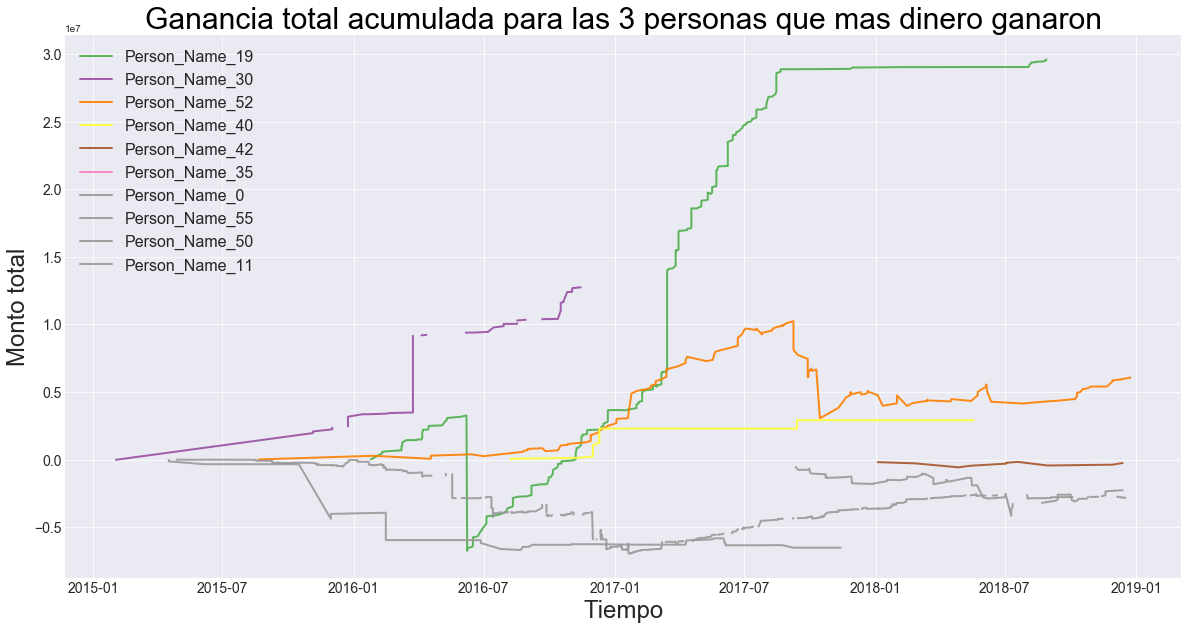

In [16]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
num=1
plt.figure(figsize=(20,10))
for vendedor in mejores_3:
    num+=1
    df_show = df_mejores_3[df_mejores_3["Opportunity_Owner"] == vendedor]

    plt.plot(df_show['Opportunity_Created_Date'], df_show["cumsum total"], marker='', color=palette(num), linewidth=2, alpha=0.9,label=vendedor)
    
plt.legend(loc=2, ncol=1,fontsize=16)

# Add titles
plt.title("Ganancia total acumulada para las 3 personas que mas dinero ganaron", fontsize=30, fontweight=1, color='black')
plt.xlabel("Tiempo", fontsize=24)
plt.ylabel("Monto total", fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("hola")
